**Importing the necessary libraries.**

In [ ]:
# vm = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/drive/MyDrive/mall_customers (1).csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**EDA**

Univariate Analysis

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

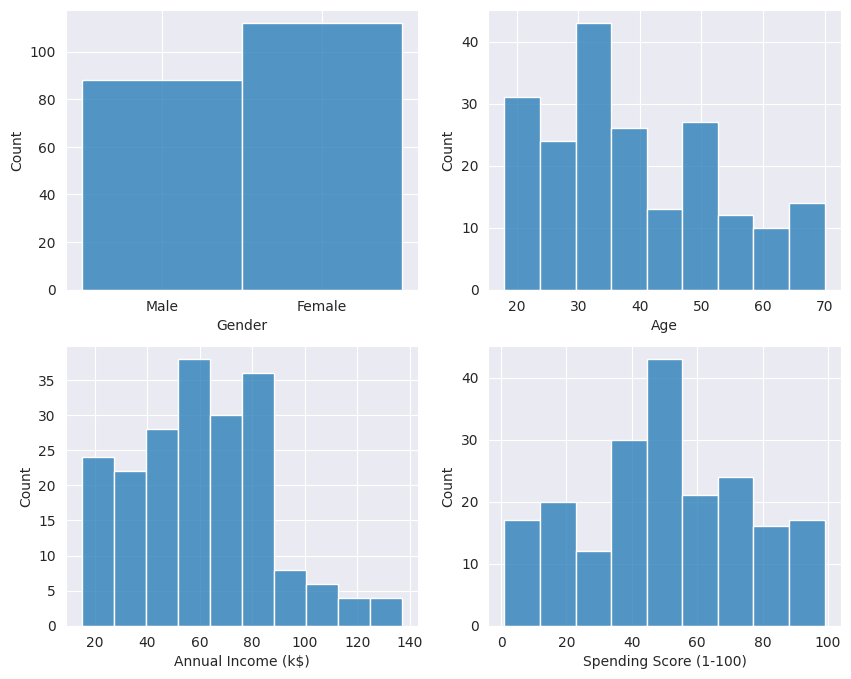

In [ ]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(2,2,figsize=(10,8))
sns.histplot(data['Gender'],ax=ax[0,0])
sns.histplot(data['Age'],ax=ax[0,1])
sns.histplot(data['Annual Income (k$)'],ax=ax[1,0])
sns.histplot(data['Spending Score (1-100)'],ax=ax[1,1])

<Axes: xlabel='Spending Score (1-100)'>

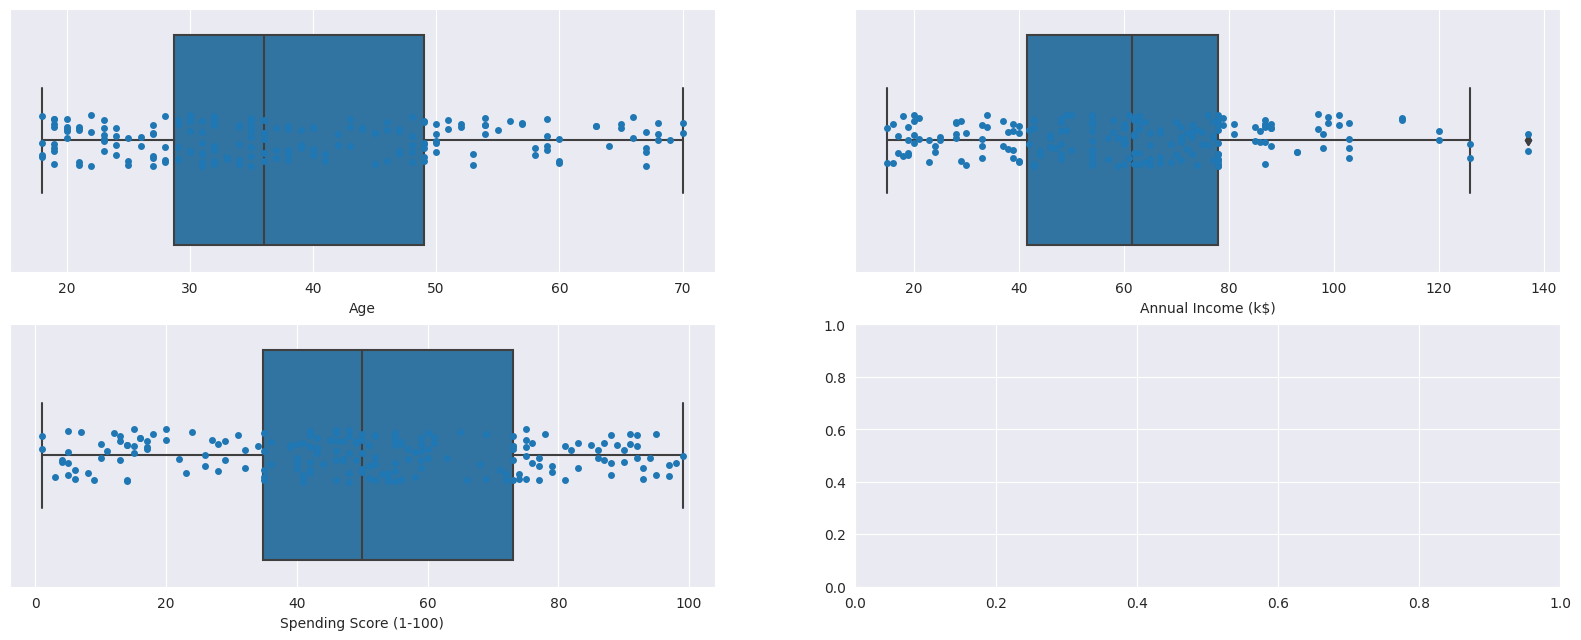

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,7.5))
sns.boxplot(x = data['Age'],ax=ax[0,0])
sns.stripplot(x = data['Age'],ax=ax[0,0])
sns.boxplot(x = data['Annual Income (k$)'],ax=ax[0,1])
sns.stripplot(x = data['Annual Income (k$)'],ax=ax[0,1])
sns.boxplot(x = data['Spending Score (1-100)'],ax=ax[1,0])
sns.stripplot(x = data['Spending Score (1-100)'],ax=ax[1,0])

Multivariate Analysis

<Figure size 2000x1000 with 0 Axes>

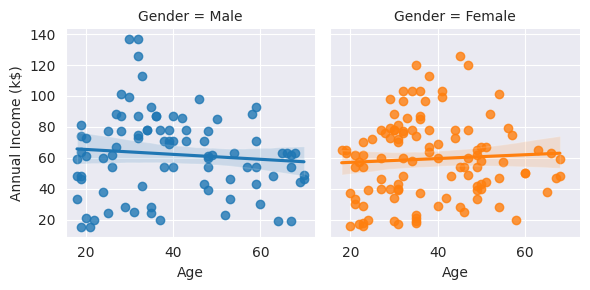

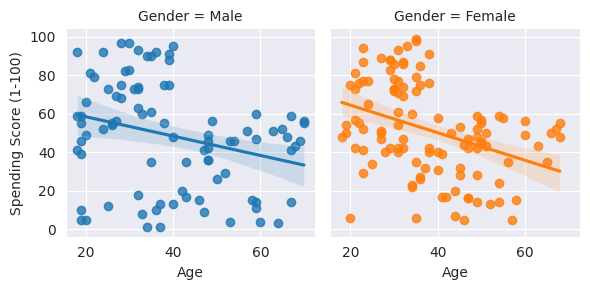

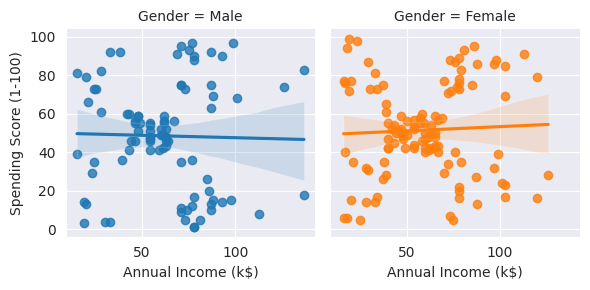

In [ ]:
plt.figure(figsize=(20,10))
sns.lmplot(
    data=data, x="Age", y="Annual Income (k$)",
    hue="Gender", col="Gender", height=3
)
sns.lmplot(
    data=data, x="Age", y="Spending Score (1-100)",
    hue="Gender", col="Gender", height=3
)
sns.lmplot(
    data=data, x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Gender", col="Gender", height=3
)

In [3]:
data.drop('CustomerID',axis=1,inplace=True)

In [4]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<ipython-input-65-91f05bae93a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

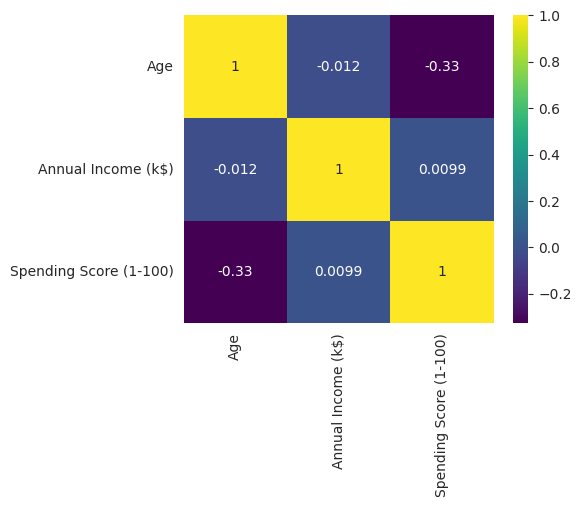

In [ ]:
plt.figure(figsize=(5,4))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='viridis')

**Encoding**

In [5]:
num_cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
num_df = data[num_cols]
num_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
enc_df = pd.get_dummies(data)

In [7]:
enc_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [8]:
scl = StandardScaler()
scl_df = scl.fit_transform(num_df)
scl_df = pd.DataFrame(scl_df,columns=num_df.columns)
scl_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [9]:
scl_df['Gender_Female'] = enc_df['Gender_Female']
scl_df['Gender_Male'] = enc_df['Gender_Male']

In [10]:
scl_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0


**Modelling**

In [11]:
scores = []
for n in range(1,20):
  kmeans = KMeans(n_clusters = n ,init='k-means++',random_state=11,n_init = 10)
  kmeans.fit(scl_df)
  scores.append(kmeans.inertia_)


Text(0, 0.5, 'Inertia')

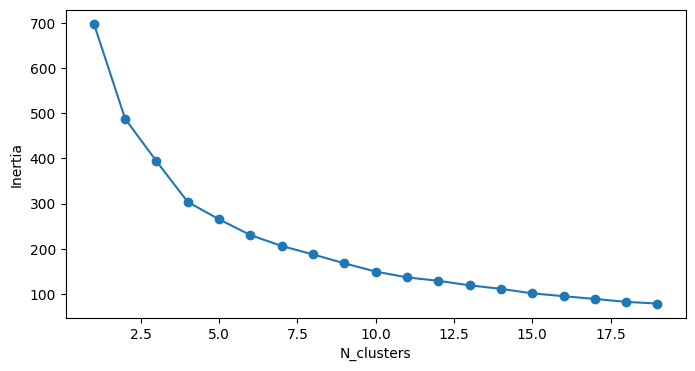

In [12]:
plt.figure(figsize=(8,4))
frame = pd.DataFrame({'cluster':range(1,20),'Inertia':scores})
plt.plot(frame['cluster'],frame['Inertia'],marker='o')
plt.xlabel('N_clusters')
plt.ylabel('Inertia')

In [13]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=11,n_init=10)
kmeans.fit(scl_df)
pred = kmeans.predict(scl_df)

In [14]:
pred_df = pd.DataFrame(pred)
pred_df['Cluster'] = pred

In [15]:
pred_df[['Cluster']].value_counts()

Cluster
3          56
2          44
1          39
0          34
4          27
dtype: int64

In [16]:
data['clusters'] = kmeans.labels_

In [17]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


In [ ]:
data.groupby('clusters')[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].agg(['min','max','mean'])

<ipython-input-23-3187694fbffb>:1: FutureWarning: ['Gender'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('clusters')[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].agg(['min','max','mean'])


Age                Annual Income (k$)                  \
         min max       mean                min  max       mean   
clusters                                                         
0         19  59  41.264706                 71  137  88.500000   
1         27  40  32.692308                 69  137  86.538462   
2         18  43  29.340909                 16   76  50.750000   
3         45  70  56.017857                 19   79  48.750000   
4         18  35  24.592593                 15   48  28.333333   

         Spending Score (1-100)                 
                            min max       mean  
clusters                                        
0                             1  39  16.764706  
1                            63  97  82.128205  
2                             6  61  43.022727  
3                             3  60  42.071429  
4                            39  99  74.740741

**Visualising the data with clusters**

In [18]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


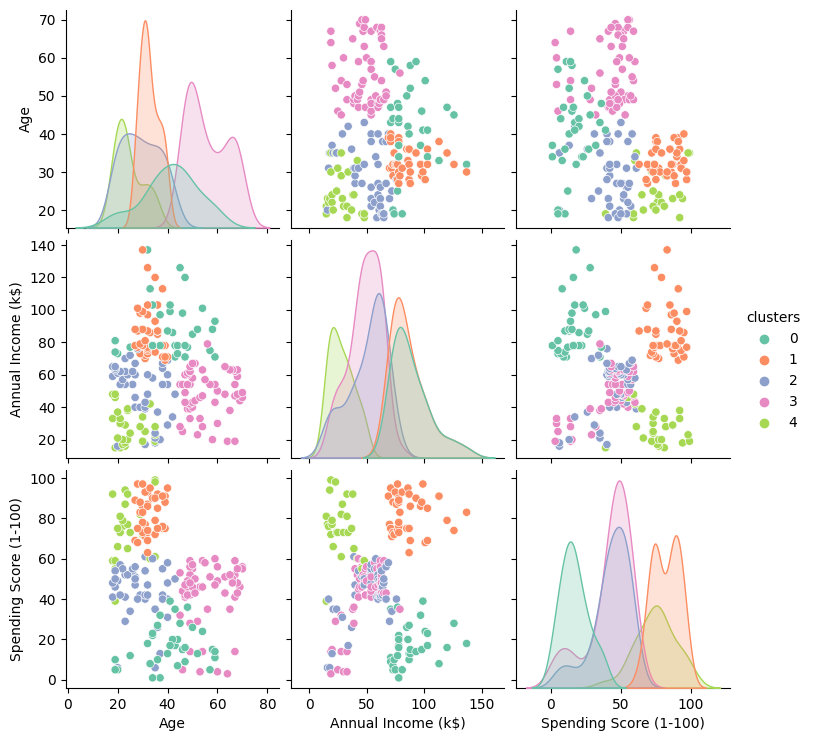

In [48]:
sns.pairplot(data, hue='clusters',palette=('Set2'))

**A couple takaways from the visualizations**:


*   We can observe a clear definition within the customer age and spending_score, with overlaps occurring amongst 2 clusters.

*   A closer look at the annual_income/age also potrays clusters 0 and 1 accounting for the majority of high income earners and falling between the 20 - 40 year range.

*   Interesting also to note is that cluster 4 appear to have a pretty solid scoring_score(65-100) despite ranking as part of the least Annual_income earners.




